In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cef_regression import *


In [3]:
# available data for tickers ADX, CII, EOS
CEF_TICKER1 = "ADX"
CEF_TICKER2 = "CII"
CEF_TICKER3 = "EOS"
ANALYSIS_DATA_PERIOD = PERIOD_1YEAR
AVERAGES_CALC_PERIOD = PERIOD_3MONTHS
TRAIN_DATA_RATIO = 0.75
REGRESSOR_COL_NAME = NAV_RETURNS_COL_NAME # NAV_RETURNS_COL_NAME, PREM_DISC_ZSCORE_COL_NAME


# NAV Returns And Premium/Discount As Factors For Analyzing Price Returns Of Closed-End Fund 
***
Hristo T. Raykov  
email: hristocr@gmail.com

***

## Abstract
***
Most of the researches on the matter cites NAV as valid predictive indicator for CEF prices. Apart from NAV returns we assume  premium/discount have correlation with  prices based on fundamental relationship. In the first part of the analysis we test both factors NAV returns and premium/discount z-scores as regressing them with price returns. Regression model rejects premium/discount z-scores as meaningful factor and confirms that NAV returns have high correlation with price returns. In the second part we make a trading simulation based on regression model residuals z-score. The simulation recalculates the parameters on the daily basis and uses only historical data for predictions. Experiments with three CEFs traded on the NYSE show positive results and all of them were profitable. Although positive experiments are too few and the trading simulation is too simplе with many limitations for the model to be of practical use. Further improvement and testing is needed.

***

## Keywords
***
Closed-End Funds, Returns, NAV, Premium/Discounts,  Regression, Z-Score, Residuals

## 1. Introduction
***
[Closed-End Funds(CEFs)](https://en.wikipedia.org/wiki/Closed-end_fund) are exchange traded funds that unlike open-end funds are not redeemable from the fund itself but freely traded between market participants. Because of that a substantial differences between market price and net asset value (NAV) can exist - so called "CEF puzzle". These Price-NAV difference is known as Premium/Discount and sometimes may look very irrational. For example a fund traded at discount to NAV may offer better returns than similar fund traded on Premium. Many factors can contribute to this fenomena - investing strategy, investing sector, managment performance, managment fees,  macroeconomic indicators, financial market psychology etc. Finding and analyzing factors for  pricing CEFs can be very difficult task. 

The main purpose of the research is to analyze Closed-End Funds by searching for appropriаte factors for valuation.
Create a regression model and test it with trading simulation for exploring how the model behaves with real data. The real life problem that we state is how to improve our trading CEF strategy by conducting financial quantative analysis. 


## 2. Literature Review
***

Conducted analysis is based on [regression model](https://en.wikipedia.org/wiki/Regression_analysis) which is very used from practioners in many fields of science. Quantative finance and economic analyzes depend on that model, many financial theories lay their foundations on it. A lot of theoretical models are well described in "Investments" by Bodie, Kane and Marcus. These models can be very complicated and further extended for the need of the research. Big investment banks, hedge funds, portfolio managers conduct very advanced algorithm that continuous develop by large teams of programmers, financiers and mathematicians to get some advantage in predicting stock prices over the other participants in financial markets after all it's a kind of "zero sum game" some loss other gain. There is many theories about market price movements and whether it is possible to make a valid model that can give you stable profits for a long period of time.

This research uses linear regression model.  [Regression ](https://en.wikipedia.org/wiki/Simple_linear_regression) analyzes the relationship between two variable and can be described as:

$$ y_i = \alpha + \beta x_i + \epsilon_i $$

where $ \epsilon_i $ is so called residual. The main goal is finding such $ \alpha $ and $ \beta $ that minimizes the sum of square residuals $ \epsilon_i = y_i - \bar{y} $. The model can be further generalized for 'n' independent variables. 

Another useful indicator is Pearson correlation coefficient:
$$ \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y} $$ 

$$  r_xy = \frac{\sum_{i=1}^n{(x_i -\bar{x})(y_i -\bar{y})}}{\sqrt{ \sum_{i=1}^{n}(x_i -\bar{x})^2 } \sqrt{ \sum_{i=1}^{n}(y_i -\bar{y})^2 }  } $$ 

that show how strong is the relationship. Together with coefficient of determination $ R^2 $ which explains what part of changes in dependent variable is due to changes in the independent variable are very powerful validation for the credibility of the model.

Most of the analyzed factors that can be found in the internet available  in scientific papers and professionals societies try to find macro factors such as broader market index, interest rates, GDP and so on. This research emphasizes on fundamentals of the CEFs - performance, premium/discounts, risk of rates of return.  

Many of previous researches analyze the factors for persistence in CEF discounts, try to find why CEFs discount are normal fenomena and what drives them - "The Persistence and Predictability of Closed-End Fund Discounts". Few explain why many of the CEFs trade on premium which we will take into account in our simulation. As stated in "The Closed-End Fund Discount and Performance Persistence" there is no indication of correlation between fund discounts and managment performance but rather correlation between variance of returns (residual risk)  and discounts.


## 3. Methods
***
In the first part of the analysis we search for appropriate factors for pricing CEFs. Based on other researches we can conclude that finding valid predictors isn't an easy job. Besides the obvious one - NAV which is the main factor for valuating funds, it's hard to find other fundamental indicators that  correlate strong enough to have predictive power in practice. Another factor that we will test is premium/discount z-score which give us information for extreme NAV-price deviations. 

In the second part of the research we will conduct a trading simulation that test prediction power of the regression between price rates of return and NAV rates of return. We assume that strong signal for entering in position long/short will be extreme deviations in residuals risk. Standart deviation of the error measured as z-score between actuals price rate of returns and those predicted from the regression equation. As values close to -2 or 2 are considered extreme for residual z-scores we will use:
* -1.5 - current value is well below predicted, indicate underpricing buy signal - taking long position
* -0.5 - covering long position
* 1.5 - current value is well over predicted, indicate overpricing sell signal - taking short position
* 0.5 - covering short position

We should poin that the model have many limitations. It take into account only historical prices and navs but in practice there are many other factors that can infuence price returns. Trading simulation is very simple, makes maximum one trade per day and have no stopp loss. Even all these shortcomings lets analyze and test our assumtion.

Raw data needed for the research is provided in csv format. There are data for three CEFs traded on the NYSE - ADX, CII, EOS. They are picked based on good liquidity (average traded volume) and primary investment strategy- general equity (common stocks). In one file is located data for the daily prices and in another for nav daily quotes. Reading data from input file calculating rate of returns for prices and navs and premium/discount z-score for the given period is the first step in processing data. At the end we save the processed data in a file because calculation is time consuming. This method should be called only if ananlysis period or other related variable is changed. 
***

In [4]:
# run only if change TRAIN_DATA_RATIO, AVERAGES_CALC_PERIOD, ANALYSIS_DATA_PERIOD etc.
# take about several minutes to calculate one year of historical data
# calculate_cef_data(CEF_TICKER1, ANALYSIS_DATA_PERIOD, AVERAGES_CALC_PERIOD)
# calculate_cef_data(CEF_TICKER2, ANALYSIS_DATA_PERIOD, AVERAGES_CALC_PERIOD)
# calculate_cef_data(CEF_TICKER3, ANALYSIS_DATA_PERIOD, AVERAGES_CALC_PERIOD)

***
After cleaning raw data we read it from the file and split it to train and test data. Run two  regression analyzes for the two tested factors - nav returns and premium/discount z-score to see how they correlate with price returns.
***

/home/hristocr/anaconda3/envs/jupyter-notebook/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


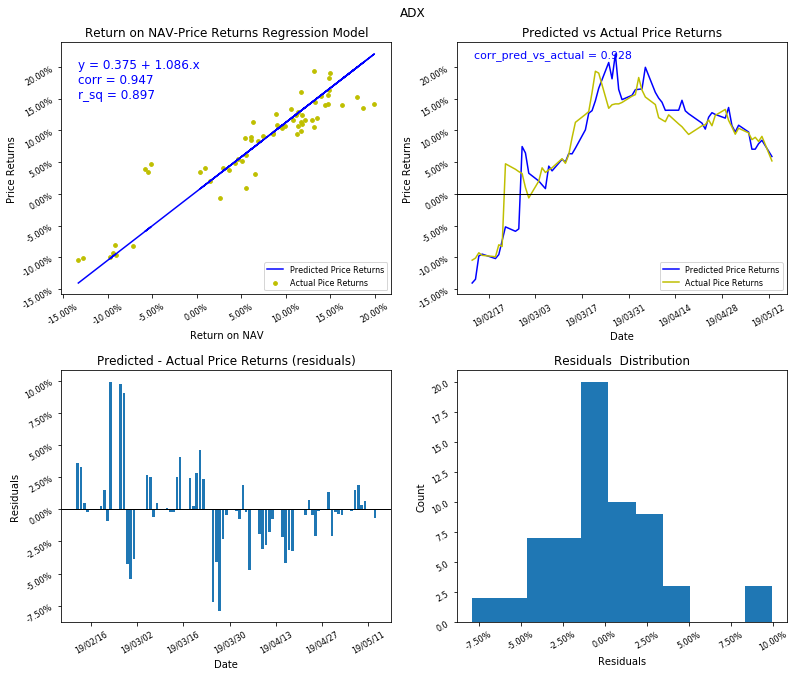

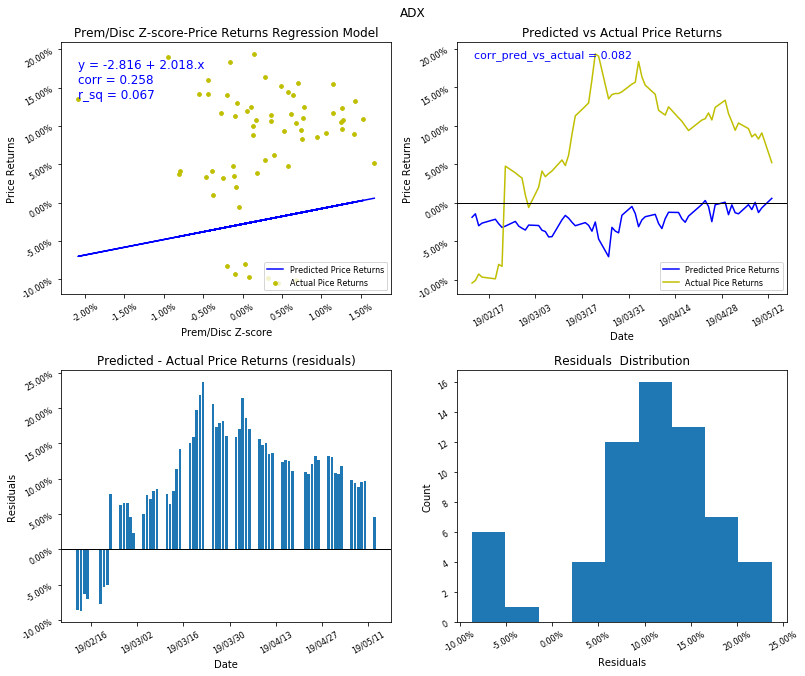

In [5]:
adx = read_processed_cef_data("ADX")
adx_train_data, adx_test_data = split_train_test_data(adx, TRAIN_DATA_RATIO)

adx_nav_regress_data, adx_nav_regress_statistics = analyze_regression("ADX", adx_train_data,
                                                      adx_test_data, NAV_RETURNS_COL_NAME,
                                                      PRICE_RETURNS_COL_NAME)
adx_prem_disc_regress_data, adx_prem_disc_regress_statistics = analyze_regression("ADX", adx_train_data,
                                                      adx_test_data, PREM_DISC_ZSCORE_COL_NAME,
                                                      PRICE_RETURNS_COL_NAME)

plot_regress_result(adx_nav_regress_data, adx_nav_regress_statistics)
plot_regress_result(adx_prem_disc_regress_data, adx_prem_disc_regress_statistics)

## 4. Results 
***
As we can see nav-price return correlation is very strong $ \rho = 0.94 $ and $ R^2 = 0.89 $ show that nav returns may have predictive power over price returns.

As opposite the correlation between premium/dicount z-scores have no predictive power over price returns with low correlation $ \rho = 0.25 $. This result is confirmed by other research papers on the matter too. So as premium discounts z-scores dropped as meaningful factor lets look at residuals($ \epsilon $) of nav-price returns. They have a normal distribution but there are too many extreme values as it can be seen on the bar chart. Ranging from -6% to 9% difference in asset return is unacceptable for financial investors. The risk measured as standard deviation of the residuals is too high. We can try to find trading apportunities  by looking for relatively extreme from the model prediction values by calculating residuals z-score. 

To make simulation more realistic residual z-scores are calculated based on trailing historical values. Regression model is recalculated for each trading day by taking into accout only previous daily prices and thus it has real predictive power. 

Now lets run the simulation for ADX.
***

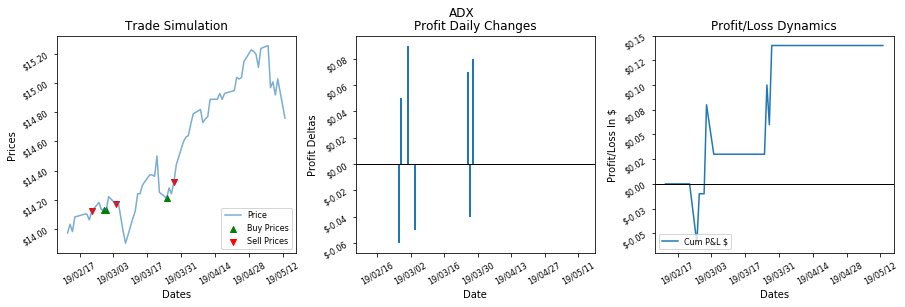

        Date  Price  Res Z-score       Action HP (days) P&L Delta $ Cum P&L $
0 2019-02-22  14.12         3.07   SELL_SHORT         0           0         0
1 2019-02-27  14.13        -1.69  COVER_SHORT         5       -0.01     -0.01
2 2019-02-28  14.13        -1.62     BUY_LONG         0           0     -0.01
3 2019-03-04  14.17         0.02   COVER_LONG         4        0.04      0.03
4 2019-03-25  14.21        -2.31     BUY_LONG         0           0      0.03
5 2019-03-28  14.32        -0.40   COVER_LONG         3        0.11      0.14


In [6]:
adx_simulation_start_date = adx_test_data[DATE_COL_NAME].values[0]
adx_simul_data = calculate_trailing_residual_zscores(adx, NAV_RETURNS_COL_NAME, adx_simulation_start_date,
                                                     AVERAGES_CALC_PERIOD)

adx_trades, adx_continuos_profits = run_residual_trade_simulation(adx_simul_data)
plot_trade_simulation("ADX", adx_trades, adx_continuos_profits)
print(adx_trades)


***
We make a profit of 14 cents with 5 trades over a tested period of three months. There is no major drawbacks in cumulative P&L. The result of one simulation can not be indicative for the model accuracy. Let's run the simulation on the other two CEFs that we have data for - CII and EOS.
***

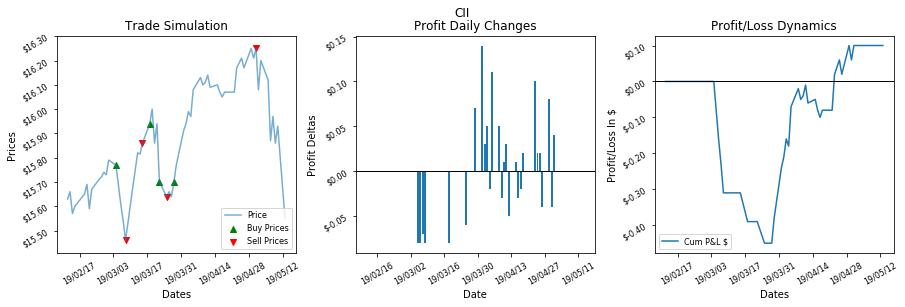

        Date  Price  Res Z-score       Action HP (days) P&L Delta $ Cum P&L $
0 2019-03-04  15.77        -2.24     BUY_LONG         0           0         0
1 2019-03-08  15.46         0.06   COVER_LONG         4       -0.31     -0.31
2 2019-03-15  15.86         1.50   SELL_SHORT         0           0     -0.31
3 2019-03-18  15.94        -0.14  COVER_SHORT         3       -0.08     -0.39
4 2019-03-22  15.70        -1.55     BUY_LONG         0           0     -0.39
5 2019-03-25  15.64         0.12   COVER_LONG         3       -0.06     -0.45
6 2019-03-28  15.70        -1.59     BUY_LONG         0           0     -0.45
7 2019-05-01  16.25        -0.45   COVER_LONG        34        0.55      0.10


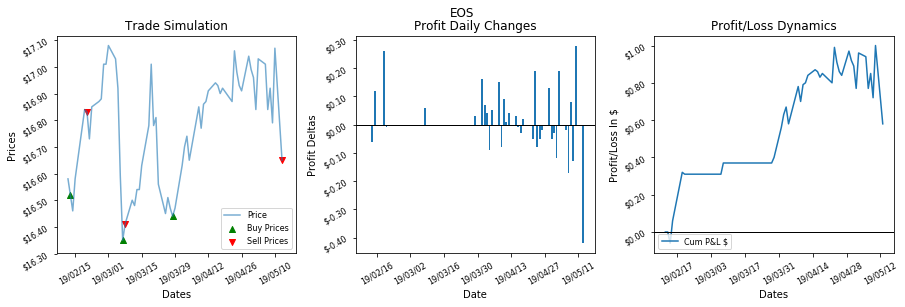

        Date  Price  Res Z-score      Action HP (days) P&L Delta $ Cum P&L $
0 2019-02-13  16.52        -1.54    BUY_LONG         0           0         0
1 2019-02-20  16.83        -0.49  COVER_LONG         7        0.31      0.31
2 2019-03-07  16.35        -1.54    BUY_LONG         0           0      0.31
3 2019-03-08  16.41        -0.46  COVER_LONG         1        0.06      0.37
4 2019-03-28  16.44        -1.69    BUY_LONG         0           0      0.37
5 2019-05-13  16.65         0.41  COVER_LONG        46        0.21      0.58


In [7]:
cii = read_processed_cef_data("CII")
cii_train_data, cii_test_data = split_train_test_data(cii, TRAIN_DATA_RATIO)
cii_simulation_start_date = cii_test_data[DATE_COL_NAME].values[0]
cii_simul_data = calculate_trailing_residual_zscores(cii, NAV_RETURNS_COL_NAME, cii_simulation_start_date,
                                                     AVERAGES_CALC_PERIOD)
cii_trades, cii_continuos_profits = run_residual_trade_simulation(cii_simul_data)
plot_trade_simulation("CII", cii_trades, cii_continuos_profits)
print(cii_trades)

eos = read_processed_cef_data("EOS")
eos_train_data, eos_test_data = split_train_test_data(eos, TRAIN_DATA_RATIO)
eos_simulation_start_date = eos_test_data[DATE_COL_NAME].values[0]
eos_simul_data = calculate_trailing_residual_zscores(eos, NAV_RETURNS_COL_NAME, eos_simulation_start_date,
                                                     AVERAGES_CALC_PERIOD)
eos_trades, eos_continuos_profits = run_residual_trade_simulation(eos_simul_data)
plot_trade_simulation("EOS", eos_trades, eos_continuos_profits)
print(eos_trades)

***
Both simulations have positive results CII make profit of 10 cents with 7 trades and EOS 58 cents with 5 trades. What attracs attention is the long holding period for the last trades in CII and EOS this indicates that extreme deviations from the mean residual can hold for a long period of time. This makes realizing profits in practice harder even with valid prediction model.

## 5. Conclusion
***
The model reject premium/discounts as meaningful factor for price returns prediction. As cited in other researches NAV is valid predictive indicator for CEF prices. This is shown in trading simulation which despite its simplicity and lack of active management got 3 positive results of 3 experiments. Note that simulation recalculates the model on daily basis. Although positive experiments are too few for results to have practical value. Further testing and improving of the model is needed to be of real practical use and help CEFs investors to  make better decisions.

## References
***

Bodie, Z., Kane, A. and Marcus, A. (2011). Investments. 9th ed. New York: McGraw-Hill/Irwin.

Malkiel, Burton G. and Xu, Yexiao, The Persistence and Predictability of Closed-End Fund Discounts (March 2005). Available at SSRN: https://ssrn.com/abstract=686981 or http://dx.doi.org/10.2139/ssrn.686981

Dimson, Elroy & Minio-Kozerski, Carolina. (2012). The Closed-End Fund Discount and Performance Persistence. 

Wikipedia. 2019. Closed-end_fund. [ONLINE] Available at: https://en.wikipedia.org/wiki/Closed-end_fund. [Accessed 23 May 2019].

Wikipedia. 2019. Regression_analysis. [ONLINE] Available at: https://en.wikipedia.org/wiki/Regression_analysis. [Accessed 23 May 2019].

Wikipedia. 2019. Simple_linear_regression. [ONLINE] Available at: https://en.wikipedia.org/wiki/Simple_linear_regression. [Accessed 23 May 2019].

Seeking Alpha. 2019. investor-sentiment-herding-closed-end-fund-discount. [ONLINE] Available at: https://seekingalpha.com/article/4195386-investor-sentiment-herding-closed-end-fund-discount. [Accessed 23 May 2019].

